Each fix is generally 6 hours from the last except when a special fix is noted, such as landfall.
The storm status follows given by a two-letter code:

WV - Tropical Wave
TD - Tropical Depression
TS - Tropical Storm
HU - Hurricane
EX - Extratropical cyclone
SD - Subtropical depression (winds <34 kt)
SS - Subtropical storm (winds >34 kt)
LO - A low pressure system not fitting any of above descriptions
DB - non-tropical Disturbance not have a closed circulation

# DATA VISUALIZATION



In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import random as rd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
warnings.filterwarnings('ignore')
plt.style.use("bmh")
from matplotlib import rcParams

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/coolrishi28/Hurricane_Intensification/main/atlantic.csv')
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Date              49105 non-null  int64 
 3   Time              49105 non-null  int64 
 4   Event             49105 non-null  object
 5   Status            49105 non-null  object
 6   Latitude          49105 non-null  object
 7   Longitude         49105 non-null  object
 8   Maximum Wind      49105 non-null  int64 
 9   Minimum Pressure  49105 non-null  int64 
 10  Low Wind NE       49105 non-null  int64 
 11  Low Wind SE       49105 non-null  int64 
 12  Low Wind SW       49105 non-null  int64 
 13  Low Wind NW       49105 non-null  int64 
 14  Moderate Wind NE  49105 non-null  int64 
 15  Moderate Wind SE  49105 non-null  int64 
 16  Moderate Wind SW  49105 non-null  int64 
 17  Moderate Win

In [ ]:
df.shape

(49105, 22)

In [ ]:
originalfeatures = df.columns
print('Original Features Count:',len(originalfeatures))
print('Original Features: ',originalfeatures)

Original Features Count: 22
Original Features:  Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')


In [ ]:
missing_value = ["-999", "0", np.nan]
df = pd.read_csv('https://raw.githubusercontent.com/coolrishi28/Hurricane_Intensification/main/atlantic.csv', na_values = missing_value)

In [ ]:
df.isnull().sum()

ID                      0
Name                    0
Date                    0
Time                11946
Event                   0
Status                  0
Latitude                0
Longitude               0
Maximum Wind            0
Minimum Pressure    30669
Low Wind NE         45268
Low Wind SE         45431
Low Wind SW         46244
Low Wind NW         45807
Moderate Wind NE    46946
Moderate Wind SE    47111
Moderate Wind SW    47445
Moderate Wind NW    47279
High Wind NE        47915
High Wind SE        47951
High Wind SW        48113
High Wind NW        48074
dtype: int64

In [ ]:
df.isnull().any()
#sns.heatmap(df.isnull(), yticklabels = False, annot = True)

ID                  False
Name                False
Date                False
Time                 True
Event               False
Status              False
Latitude            False
Longitude           False
Maximum Wind        False
Minimum Pressure     True
Low Wind NE          True
Low Wind SE          True
Low Wind SW          True
Low Wind NW          True
Moderate Wind NE     True
Moderate Wind SE     True
Moderate Wind SW     True
Moderate Wind NW     True
High Wind NE         True
High Wind SE         True
High Wind SW         True
High Wind NW         True
dtype: bool

In [ ]:
df_new = df.dropna()
#df.fillna(0),df.fillna(method='bfill'),df.fillna(method='ffill')
#df.interpolate()
df_new

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
43116,AL012004,ALEX,20040803,1800.0,,HU,35.3N,75.2W,85,972.0,...,75.0,50.0,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0
43118,AL012004,ALEX,20040804,600.0,,HU,36.8N,72.1W,80,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
43119,AL012004,ALEX,20040804,1200.0,,HU,37.3N,70.2W,85,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
43120,AL012004,ALEX,20040804,1800.0,,HU,37.8N,68.3W,95,965.0,...,125.0,75.0,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0
43122,AL012004,ALEX,20040805,600.0,,HU,39.5N,63.1W,105,957.0,...,200.0,75.0,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49046,AL112015,JOAQUIN,20151005,1200.0,,HU,34.4N,65.2W,75,964.0,...,140.0,130.0,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0
49047,AL112015,JOAQUIN,20151005,1800.0,,HU,35.3N,64.5W,75,964.0,...,150.0,130.0,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0
49049,AL112015,JOAQUIN,20151006,600.0,,HU,37.0N,62.3W,75,970.0,...,170.0,150.0,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0
49050,AL112015,JOAQUIN,20151006,1200.0,,HU,37.9N,60.4W,70,974.0,...,190.0,150.0,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0


In [ ]:
df_new = df_new.drop_duplicates()
#df_new = df_new.drop(columns = " ")
df_new

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
43116,AL012004,ALEX,20040803,1800.0,,HU,35.3N,75.2W,85,972.0,...,75.0,50.0,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0
43118,AL012004,ALEX,20040804,600.0,,HU,36.8N,72.1W,80,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
43119,AL012004,ALEX,20040804,1200.0,,HU,37.3N,70.2W,85,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
43120,AL012004,ALEX,20040804,1800.0,,HU,37.8N,68.3W,95,965.0,...,125.0,75.0,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0
43122,AL012004,ALEX,20040805,600.0,,HU,39.5N,63.1W,105,957.0,...,200.0,75.0,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49046,AL112015,JOAQUIN,20151005,1200.0,,HU,34.4N,65.2W,75,964.0,...,140.0,130.0,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0
49047,AL112015,JOAQUIN,20151005,1800.0,,HU,35.3N,64.5W,75,964.0,...,150.0,130.0,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0
49049,AL112015,JOAQUIN,20151006,600.0,,HU,37.0N,62.3W,75,970.0,...,170.0,150.0,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0
49050,AL112015,JOAQUIN,20151006,1200.0,,HU,37.9N,60.4W,70,974.0,...,190.0,150.0,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0


In [ ]:
df_new = df_new.reset_index(drop = True)
df_new

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL012004,ALEX,20040803,1800.0,,HU,35.3N,75.2W,85,972.0,...,75.0,50.0,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0
1,AL012004,ALEX,20040804,600.0,,HU,36.8N,72.1W,80,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
2,AL012004,ALEX,20040804,1200.0,,HU,37.3N,70.2W,85,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
3,AL012004,ALEX,20040804,1800.0,,HU,37.8N,68.3W,95,965.0,...,125.0,75.0,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0
4,AL012004,ALEX,20040805,600.0,,HU,39.5N,63.1W,105,957.0,...,200.0,75.0,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,AL112015,JOAQUIN,20151005,1200.0,,HU,34.4N,65.2W,75,964.0,...,140.0,130.0,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0
659,AL112015,JOAQUIN,20151005,1800.0,,HU,35.3N,64.5W,75,964.0,...,150.0,130.0,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0
660,AL112015,JOAQUIN,20151006,600.0,,HU,37.0N,62.3W,75,970.0,...,170.0,150.0,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0
661,AL112015,JOAQUIN,20151006,1200.0,,HU,37.9N,60.4W,70,974.0,...,190.0,150.0,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0


In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'] , format= '%Y%m%d')

In [ ]:
df_new

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL012004,ALEX,2004-08-03,1800.0,,HU,35.3N,75.2W,85,972.0,...,75.0,50.0,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0
1,AL012004,ALEX,2004-08-04,600.0,,HU,36.8N,72.1W,80,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
2,AL012004,ALEX,2004-08-04,1200.0,,HU,37.3N,70.2W,85,973.0,...,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
3,AL012004,ALEX,2004-08-04,1800.0,,HU,37.8N,68.3W,95,965.0,...,125.0,75.0,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0
4,AL012004,ALEX,2004-08-05,600.0,,HU,39.5N,63.1W,105,957.0,...,200.0,75.0,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,AL112015,JOAQUIN,2015-10-05,1200.0,,HU,34.4N,65.2W,75,964.0,...,140.0,130.0,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0
659,AL112015,JOAQUIN,2015-10-05,1800.0,,HU,35.3N,64.5W,75,964.0,...,150.0,130.0,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0
660,AL112015,JOAQUIN,2015-10-06,600.0,,HU,37.0N,62.3W,75,970.0,...,170.0,150.0,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0
661,AL112015,JOAQUIN,2015-10-06,1200.0,,HU,37.9N,60.4W,70,974.0,...,190.0,150.0,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0


In [ ]:
df_new1 = df_new.drop(columns = "Name")

In [ ]:
df_new2 = df_new1.drop(columns = "Date")

In [ ]:
df_new_ = df_new2.drop(columns = "Event")

In [ ]:
df_new_

,ID,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL012004,1800.0,HU,35.3N,75.2W,85,972.0,90.0,90.0,75.0,50.0,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0
1,AL012004,600.0,HU,36.8N,72.1W,80,973.0,60.0,120.0,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
2,AL012004,1200.0,HU,37.3N,70.2W,85,973.0,60.0,120.0,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0
3,AL012004,1800.0,HU,37.8N,68.3W,95,965.0,90.0,150.0,125.0,75.0,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0
4,AL012004,600.0,HU,39.5N,63.1W,105,957.0,80.0,225.0,200.0,75.0,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,AL112015,1200.0,HU,34.4N,65.2W,75,964.0,170.0,170.0,140.0,130.0,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0
659,AL112015,1800.0,HU,35.3N,64.5W,75,964.0,170.0,170.0,150.0,130.0,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0
660,AL112015,600.0,HU,37.0N,62.3W,75,970.0,160.0,180.0,170.0,150.0,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0
661,AL112015,1200.0,HU,37.9N,60.4W,70,974.0,160.0,190.0,190.0,150.0,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0


Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

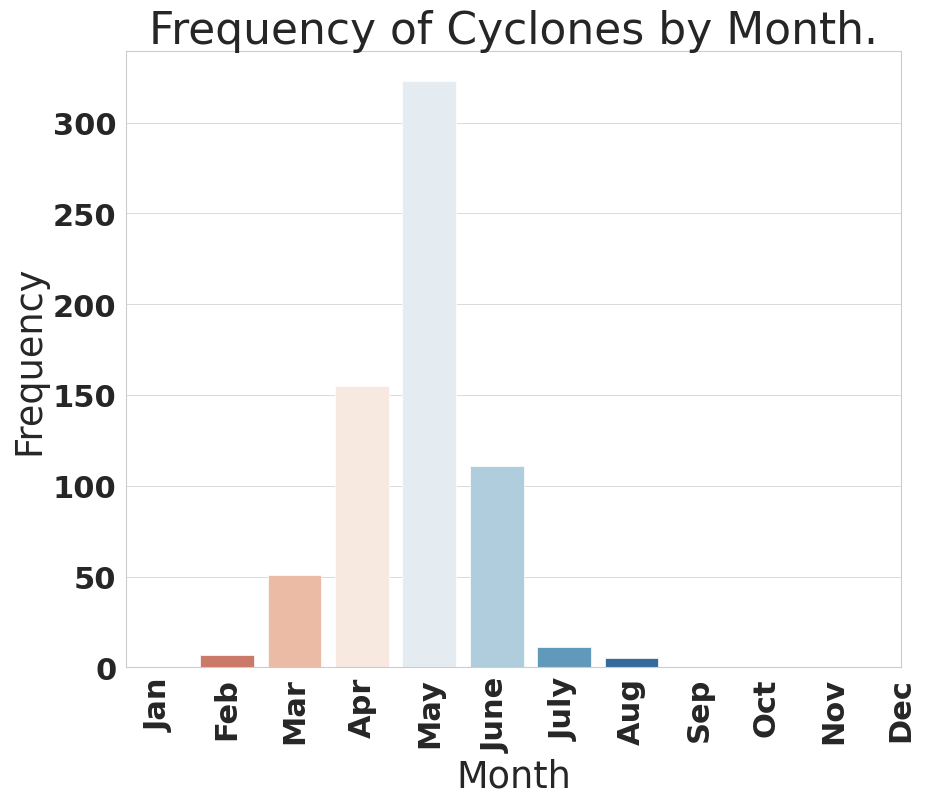

In [ ]:
df_new['Month'] = df_new['Date'].apply(lambda x: x.month)
df_new['Year'] = df_new['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = df_new.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,8))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')

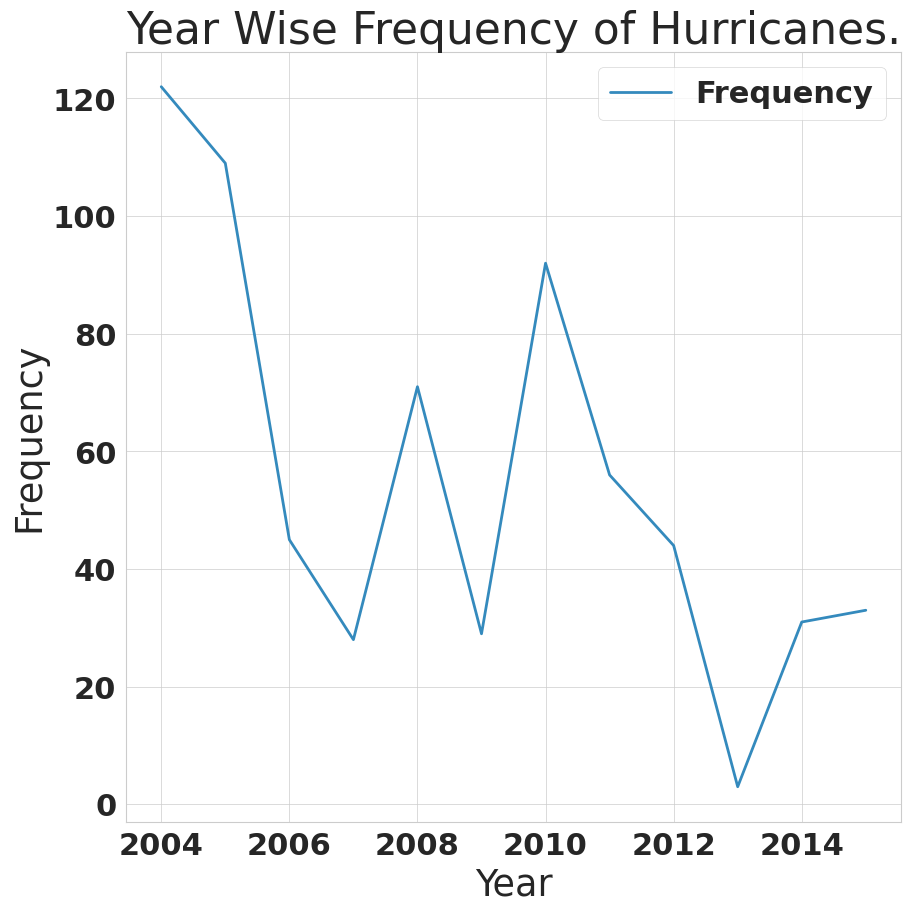

In [ ]:
temp = df_new.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (10,10))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes.')
plt.show()

In [ ]:
import re
def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

df_new_['Latitude_Hemisphere'] = df_new_['Latitude'].apply(hemisphere)
df_new_['Longitude_Hemisphere'] = df_new_['Longitude'].apply(hemisphere)
df_new_['Latitude_Hemisphere'] = df_new_['Latitude_Hemisphere'].astype('category')
df_new_['Longitude_Hemisphere'] = df_new_['Longitude_Hemisphere'].astype('category')

In [ ]:
df_new_['Latitude'] =  df_new_['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df_new_['Longitude'] =   df_new_['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

In [ ]:
df_new_

,ID,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,AL012004,1800.0,HU,35.3,75.2,85,972.0,90.0,90.0,75.0,...,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0,0,1
1,AL012004,600.0,HU,36.8,72.1,80,973.0,60.0,120.0,75.0,...,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0,0,1
2,AL012004,1200.0,HU,37.3,70.2,85,973.0,60.0,120.0,75.0,...,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0,0,1
3,AL012004,1800.0,HU,37.8,68.3,95,965.0,90.0,150.0,125.0,...,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0,0,1
4,AL012004,600.0,HU,39.5,63.1,105,957.0,80.0,225.0,200.0,...,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,AL112015,1200.0,HU,34.4,65.2,75,964.0,170.0,170.0,140.0,...,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0,0,1
659,AL112015,1800.0,HU,35.3,64.5,75,964.0,170.0,170.0,150.0,...,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0,0,1
660,AL112015,600.0,HU,37.0,62.3,75,970.0,160.0,180.0,170.0,...,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0,0,1
661,AL112015,1200.0,HU,37.9,60.4,70,974.0,160.0,190.0,190.0,...,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')

x_train = df_new_[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW']]

y_train = df_new_['Status']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

dt_scores = []
dt_recall_scores = []
dt_precision_scores = []
for tr , ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts)
    dt_scores.append(accuracy_score(yts, y_pred))
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))

In [ ]:
dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

Accuracy score for Decision Tree is : 0.9939620081411127
Recall score for Decision Tree is : 0.9939620081411127
Precision score for Decision Tree is : 0.9880610771642384


In [ ]:
df_new_["Status"] = df_new_['Status'].str.replace('HU', '1.0')
df_new_["Status"] = df_new_['Status'].str.replace('EX', '2.0')
df_new_["Status"] = df_new_['Status'].str.replace('TS', '3.0')
df_new_["Status"] = df_new_['Status'].str.replace('TD', '4.0')
df_new_["Status"] = df_new_['Status'].str.replace('LO', '5.0')

In [ ]:
df_new_ = df_new_.drop(columns = 'ID')

In [ ]:
df_new_['Status'] = df_new_['Status'].apply(pd.to_numeric)

In [ ]:
df_new_['Latitude'] = df_new_['Latitude'].apply(pd.to_numeric)

In [ ]:
df_new_['Latitude_Hemisphere'] = df_new_['Latitude_Hemisphere'].apply(pd.to_numeric)

In [ ]:
df_new_['Longitude'] = df_new_['Longitude'].apply(pd.to_numeric)

In [ ]:
df_new_['Longitude_Hemisphere'] = df_new_['Longitude_Hemisphere'].apply(pd.to_numeric)

In [ ]:
y = df_new_['Status']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
658    1.0
659    1.0
660    1.0
661    1.0
662    1.0
Name: Status, Length: 663, dtype: float64

In [ ]:
X = df_new_.drop('Status', axis = 1)
X

,Time,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,1800.0,35.3,75.2,85,972.0,90.0,90.0,75.0,50.0,60.0,50.0,30.0,30.0,30.0,30.0,20.0,15.0,0,1
1,600.0,36.8,72.1,80,973.0,60.0,120.0,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0,0,1
2,1200.0,37.3,70.2,85,973.0,60.0,120.0,75.0,75.0,40.0,75.0,50.0,50.0,20.0,50.0,30.0,15.0,0,1
3,1800.0,37.8,68.3,95,965.0,90.0,150.0,125.0,75.0,50.0,75.0,50.0,50.0,25.0,50.0,25.0,15.0,0,1
4,600.0,39.5,63.1,105,957.0,80.0,225.0,200.0,75.0,50.0,80.0,60.0,50.0,30.0,50.0,30.0,20.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1200.0,34.4,65.2,75,964.0,170.0,170.0,140.0,130.0,70.0,70.0,50.0,50.0,35.0,35.0,30.0,20.0,0,1
659,1800.0,35.3,64.5,75,964.0,170.0,170.0,150.0,130.0,70.0,80.0,50.0,50.0,35.0,35.0,25.0,20.0,0,1
660,600.0,37.0,62.3,75,970.0,160.0,180.0,170.0,150.0,90.0,90.0,70.0,60.0,40.0,35.0,25.0,30.0,0,1
661,1200.0,37.9,60.4,70,974.0,160.0,190.0,190.0,150.0,90.0,100.0,80.0,70.0,40.0,40.0,25.0,30.0,0,1


#FEATURE SELECTION AND HYPERPARAMETER TUNING


In [ ]:
data = df_new_

In [ ]:
data.corr()['Status']

Time               -0.021719
Status              1.000000
Latitude            0.212715
Longitude          -0.097043
Maximum Wind       -0.081365
Minimum Pressure   -0.000057
Low Wind NE         0.127823
Low Wind SE         0.179824
Low Wind SW         0.260838
Low Wind NW         0.104925
Moderate Wind NE    0.046325
Moderate Wind SE    0.219742
Moderate Wind SW    0.319303
Moderate Wind NW    0.127836
High Wind NE        0.033902
High Wind SE        0.132410
High Wind SW        0.189958
High Wind NW        0.057888
Name: Status, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [ ]:
y.value_counts()

1.0    659
2.0      4
Name: Status, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[132   0]
 [  0   1]]
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       132
         2.0       1.00      1.00      1.00         1

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



In [ ]:
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[132   0]
 [  1   0]]
0.9924812030075187
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       132
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99       133
   macro avg       0.50      0.50      0.50       133
weighted avg       0.99      0.99      0.99       133



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[132   0]
 [  0   1]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       132
         2.0       1.00      1.00      1.00         1

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



In [ ]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, n_estimators=400)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=120, n_estimators=400)

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[132   0]
 [  0   1]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       132
         2.0       1.00      1.00      1.00         1

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



In [ ]:
#genetic algorithm
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=8d105f10da023e1d172d874a2b623c539b4dd02106450d5c61d56841929a4cb1
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param},
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.99434666210982

Generation 2 - Current best internal CV score: 0.99434666210982

Generation 3 - Current best internal CV score: 0.99434666210982

Generation 4 - Current best internal CV score: 0.99434666210982

Generation 5 - Current best internal CV score: 0.99434666210982

Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=1800)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                      890,
                                                                                      1000],
                                                                        'max_features': ['auto',
                                                                                         'sqrt',
                                                                                         'log2'],
                                                                        'min_samples_leaf': [1,
                                                                                             2,
                                                                                             4,
                                                                                             6,
                                                                                             8],
                                                                        'min_samples_split': [2,
                                                                                              5,
                                                                                              10,
                                                                                              14],
                                                                        'n_estimators': [200,
                                                                                         400,
                                                                                         600,
                                                                                         800,
                                                                                         1000,
                                                                                         1200,
                                                                                         1400,
                                                                                         1600,
                                                                                         1800,
                                                                                         2000]}},
               cv=4, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [ ]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.9924812030075187


# MODELLING ML

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=100)

In [ ]:
X_train

,Time,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
493,600.0,13.8,62.4,85,983.0,120.0,60.0,50.0,90.0,60.0,30.0,20.0,50.0,30.0,20.0,10.0,20.0,0,1
632,600.0,13.5,47.0,95,973.0,50.0,30.0,30.0,40.0,20.0,20.0,20.0,20.0,10.0,10.0,10.0,10.0,0,1
55,600.0,11.3,57.8,95,965.0,140.0,60.0,60.0,140.0,90.0,30.0,30.0,90.0,60.0,15.0,15.0,60.0,0,1
319,1400.0,26.0,96.8,85,963.0,120.0,120.0,100.0,100.0,50.0,50.0,50.0,40.0,20.0,20.0,20.0,20.0,0,1
146,1200.0,24.8,97.6,110,944.0,140.0,110.0,75.0,90.0,100.0,60.0,40.0,65.0,60.0,35.0,25.0,40.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1200.0,33.7,42.9,85,976.0,60.0,60.0,50.0,60.0,30.0,40.0,20.0,30.0,20.0,20.0,15.0,20.0,0,1
53,600.0,10.8,50.5,110,950.0,120.0,120.0,100.0,100.0,50.0,50.0,50.0,50.0,30.0,30.0,30.0,30.0,0,1
350,600.0,21.1,76.5,100,950.0,155.0,175.0,100.0,125.0,90.0,120.0,50.0,75.0,50.0,40.0,30.0,50.0,0,1
79,600.0,25.6,87.4,120,935.0,225.0,175.0,150.0,200.0,175.0,125.0,75.0,125.0,90.0,90.0,60.0,75.0,0,1


In [ ]:
X_test

,Time,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
470,1500.0,46.6,53.2,75,950.0,400.0,350.0,350.0,350.0,200.0,180.0,140.0,160.0,75.0,45.0,60.0,75.0,0,1
462,600.0,28.4,65.2,75,949.0,300.0,225.0,200.0,260.0,160.0,130.0,120.0,140.0,75.0,45.0,60.0,75.0,0,1
230,600.0,30.1,36.0,65,987.0,100.0,100.0,100.0,130.0,40.0,30.0,40.0,50.0,25.0,20.0,25.0,25.0,0,1
48,600.0,27.2,80.2,90,960.0,175.0,160.0,125.0,160.0,125.0,100.0,75.0,120.0,75.0,60.0,40.0,60.0,0,1
395,1800.0,44.4,62.5,65,970.0,250.0,250.0,175.0,150.0,100.0,100.0,60.0,40.0,50.0,40.0,30.0,30.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1800.0,24.3,86.2,145,920.0,150.0,125.0,100.0,150.0,90.0,60.0,50.0,75.0,60.0,50.0,40.0,50.0,0,1
342,600.0,22.4,66.3,100,964.0,105.0,90.0,90.0,115.0,60.0,50.0,45.0,50.0,40.0,35.0,30.0,35.0,0,1
307,600.0,23.2,56.1,65,987.0,90.0,45.0,45.0,90.0,45.0,30.0,30.0,30.0,25.0,15.0,15.0,15.0,0,1
107,600.0,17.0,45.2,115,948.0,175.0,120.0,90.0,150.0,60.0,50.0,40.0,50.0,35.0,35.0,25.0,35.0,0,1


In [ ]:
df_new_['Status']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
658    1.0
659    1.0
660    1.0
661    1.0
662    1.0
Name: Status, Length: 663, dtype: float64

In [ ]:
df_new_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Time                  663 non-null    float64 
 1   Status                663 non-null    float64 
 2   Latitude              663 non-null    float64 
 3   Longitude             663 non-null    float64 
 4   Maximum Wind          663 non-null    int64   
 5   Minimum Pressure      663 non-null    float64 
 6   Low Wind NE           663 non-null    float64 
 7   Low Wind SE           663 non-null    float64 
 8   Low Wind SW           663 non-null    float64 
 9   Low Wind NW           663 non-null    float64 
 10  Moderate Wind NE      663 non-null    float64 
 11  Moderate Wind SE      663 non-null    float64 
 12  Moderate Wind SW      663 non-null    float64 
 13  Moderate Wind NW      663 non-null    float64 
 14  High Wind NE          663 non-null    float64 
 15  High W

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
print(y_lr_test_pred, y_lr_train_pred)

[1.13140452 1.07982231 0.96477764 0.98036603 1.01422721 1.08764138
 1.01239838 1.02658184 0.92617124 0.98833799 1.0340675  0.96013878
 1.02656239 1.00725332 0.88111311 0.93255627 1.00462978 1.01408016
 0.99142187 1.03628525 0.98028072 1.03186152 1.02229211 0.9733539
 1.01833849 1.00273909 1.02731767 0.91007926 1.03239687 1.01231562
 0.95028427 0.99134215 0.99557418 0.96538546 0.9721444  1.04986067
 0.99533307 1.00767981 0.9859265  1.03666422 1.03516328 0.9821264
 0.96769951 1.01950949 1.0507938  1.03109487 1.04673246 1.04070059
 1.04762507 1.00000739 1.15381817 1.05833169 0.98673325 0.93541837
 1.00640289 1.06612663 0.94818244 1.04615772 1.01115659 0.97609687
 1.04273537 1.04658129 0.9615096  1.02324392 1.02442859 0.95561111
 0.98477865 0.98595119 1.04176645 0.98804386 1.04176612 1.00224672
 1.00279292 0.98232295 1.02314965 1.04528914 0.99368023 0.99991738
 1.00085468 0.98696536 1.01496933 1.00613651 0.96101555 1.01680194
 0.99810624 1.04216021 1.00853687 1.02232343 0.98342868 1.034309

In [ ]:
y_lr_train_pred

array([0.96859961, 1.02304374, 0.91041671, 1.03276628, 0.925204  ,
       0.95566004, 0.98451536, 0.98096648, 1.01112476, 1.04823478,
       0.9803216 , 0.99681476, 1.00058801, 1.04503573, 1.01288946,
       0.9295922 , 0.96914265, 1.04320568, 1.00421575, 1.03651676,
       1.04161561, 1.03195323, 0.92855553, 0.98506057, 1.00807109,
       1.08135217, 1.00985987, 1.03255679, 1.03533663, 0.98865389,
       1.01346958, 1.01368873, 1.02188567, 0.99414817, 1.03546101,
       1.00616906, 0.95130031, 0.97920953, 1.0030462 , 0.98750329,
       0.97484977, 1.00810421, 1.02051275, 1.02731935, 0.98632457,
       1.05149783, 0.91994655, 0.99336591, 0.89469517, 0.9599916 ,
       0.91029402, 0.90538354, 0.95616902, 1.07244489, 0.99826168,
       0.96641228, 0.99007687, 1.0269307 , 1.23605672, 0.88611294,
       1.06329638, 1.02976767, 0.99616825, 0.94398218, 0.98608721,
       1.01913411, 0.98789829, 1.0175575 , 1.00832996, 0.98813501,
       1.00571369, 1.0303781 , 1.02055051, 1.04582075, 1.01967

In [ ]:
y_train

493    1.0
632    1.0
55     1.0
319    1.0
146    1.0
      ... 
578    1.0
53     1.0
350    1.0
79     1.0
520    1.0
Name: Status, Length: 364, dtype: float64

Text(0.5, 0, 'Experimental Status')

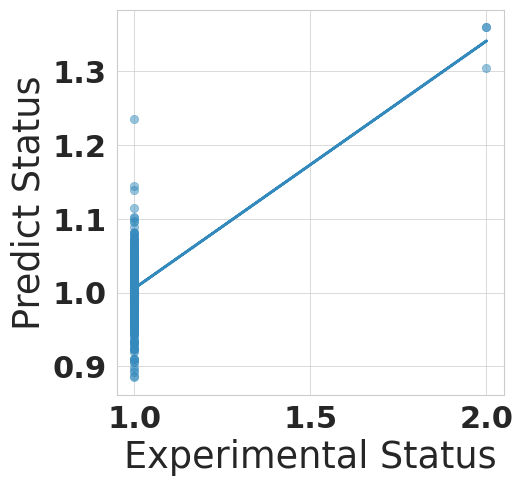

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha = 0.5)

plt.plot()
plt.ylabel('Predict Status')
plt.xlabel('Experimental Status')

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train))
plt.ylabel('Predict Status')
plt.xlabel('Experimental Status')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE(Train): ', lr_train_mse)
print('LR R2(Train): ', lr_train_r2)
print('LR MSE(Test): ', lr_test_mse)
print('LR R2(Train): ', lr_train_r2)

LR MSE(Train):  0.005428261986020892
LR R2(Train):  0.3358975068330343
LR MSE(Test):  0.003654237891799229
LR R2(Train):  0.3358975068330343


# MODELLING DL

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=19))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.0220 - val_loss: 0.0000e+00 - val_accuracy: 0.0870
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.3407 - val_loss: 0.0000e+00 - val_accuracy: 0.5719
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.8626 - val_loss: 0.0000e+00 - val_accuracy: 0.9933
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 0.

In [ ]:
pip install -U keras-tuner

In [ ]:
import kerastuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation = 'relu', input_dim=19))
  model.add(Dense(1,activation='sigmoid'))
  opt = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=72, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
6/6 [==============================] - 1s 74ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 8/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 9/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 10/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 11/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 12/100
6/6 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 13/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_

In [ ]:
def build_modelu(hp):
  model = Sequential()
  units = hp.Int('units', min_value=1, max_value=100, step=1)
  model.add(Dense(units=units, activation = 'relu', input_dim=19))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner1 = kt.RandomSearch(build_modelu, objective='val_accuracy', max_trials=5, directory='mydir', project_name='minor')

Reloading Tuner from mydir/minor/tuner0.json


In [ ]:
tuner1.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

In [ ]:
tuner1.get_best_hyperparameters()[0].values

{'units': 73}

In [ ]:
model = tuner1.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train, y_train, batch_size=72, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
6/6 [==============================] - 1s 41ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 11/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 12/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 13/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_l

In [ ]:
def build_modell(hp):
  model = Sequential()
  model.add(Dense(78,activation='relu', input_dim=19))
  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    model.add(Dense(78,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner2 = kt.RandomSearch(build_modell, objective='val_accuracy', max_trials=5, directory='mydir', project_name='num_layers')

Reloading Tuner from mydir/num_layers/tuner0.json


In [ ]:
tuner2.search(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

In [ ]:
tuner2.get_best_hyperparameters()[0].values

{'num_layers': 10}

In [ ]:
model = tuner2.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train, y_train, batch_size=72, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
6/6 [==============================] - 3s 124ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 8/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 9/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 10/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 11/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 12/100
6/6 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 13/100
6/6 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 0.9918 - val

In [ ]:
def build_modelf(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units'+str(i), min_value=1, max_value=100, step=1), activation=hp.Choice('activation'+str(i), values=['relu','tanh','sigmoid']),input_dim=19))
      model.add(Dense(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    else :
      model.add(Dense(hp.Int('units'+str(i), min_value=1, max_value=100, step=1), activation=hp.Choice('activation'+str(i), values=['relu','tanh','sigmoid'])))
      model.add(Dense(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    counter += 1
  model.add((Dense(1,activation='sigmoid')))
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
tuner3= kt.RandomSearch(build_modelf, objective='val_accuracy', max_trials=5, directory='mydir', project_name='final1')

In [ ]:
tuner3.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

In [ ]:
tuner3.get_best_hyperparameters()[0].values

In [ ]:
model = tuner3.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train, y_train, batch_size=72, epochs=100, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
6/6 [==============================] - 5s 112ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 11/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 12/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 13/100
6/6 [==============================] - 0s 30ms/